In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

In [40]:
df = pd.read_csv("heart_2022_no_nans.csv")

In [41]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [42]:
print(f"Summary Of The Dataset with numerical columns :")
df.describe()

Summary Of The Dataset with numerical columns :


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [43]:
df.duplicated().sum()

9

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  object 
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  object 
 10  HadAngina                  246013 non-null  object 
 11  HadStroke                  246013 non-null  object 
 12  HadAsthma                  246013 non-null  object 
 13  HadSkinCancer              246013 

In [46]:
print("Check number of distinct values")
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Check number of distinct values
State: 54 distinct values
Sex: 2 distinct values
GeneralHealth: 5 distinct values
PhysicalHealthDays: 31 distinct values
MentalHealthDays: 31 distinct values
LastCheckupTime: 4 distinct values
PhysicalActivities: 2 distinct values
SleepHours: 23 distinct values
RemovedTeeth: 4 distinct values
HadHeartAttack: 2 distinct values
HadAngina: 2 distinct values
HadStroke: 2 distinct values
HadAsthma: 2 distinct values
HadSkinCancer: 2 distinct values
HadCOPD: 2 distinct values
HadDepressiveDisorder: 2 distinct values
HadKidneyDisease: 2 distinct values
HadArthritis: 2 distinct values
HadDiabetes: 4 distinct values
DeafOrHardOfHearing: 2 distinct values
BlindOrVisionDifficulty: 2 distinct values
DifficultyConcentrating: 2 distinct values
DifficultyWalking: 2 distinct values
DifficultyDressingBathing: 2 distinct values
DifficultyErrands: 2 distinct values
SmokerStatus: 4 distinct values
ECigaretteUsage: 4 distinct values
ChestScan: 2 distinct values
RaceEthnicity

In [47]:
df.columns 

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [48]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

In [49]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols 

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [50]:
mypal = ['#FF5733', '#33FF57', '#3373FF', '#FF33F3', '#B4FFE4']

# Univariate Analysis:

 Univariate analysis for PhysicalHealthDays column:
 Univariate analysis for MentalHealthDays column:
 Univariate analysis for SleepHours column:
 Univariate analysis for HeightInMeters column:
 Univariate analysis for WeightInKilograms column:
 Univariate analysis for BMI column:


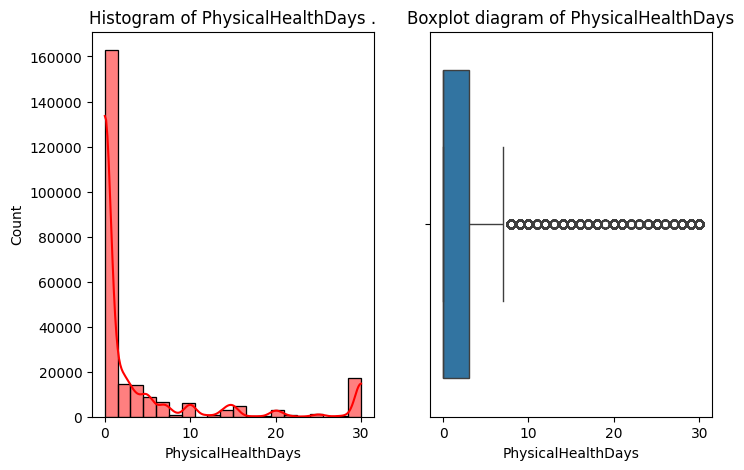

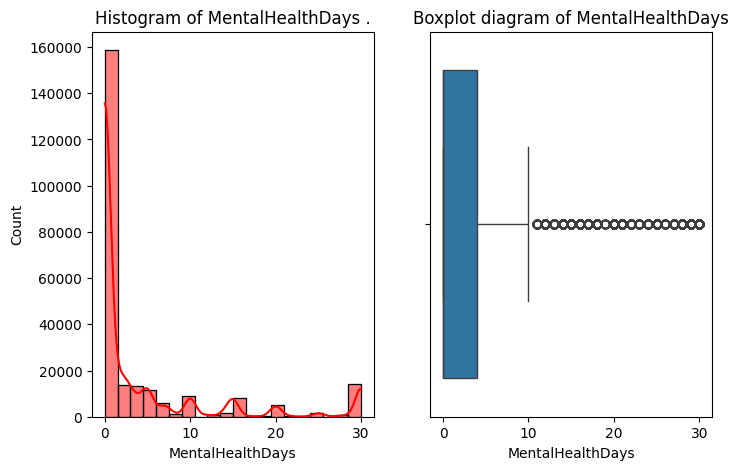

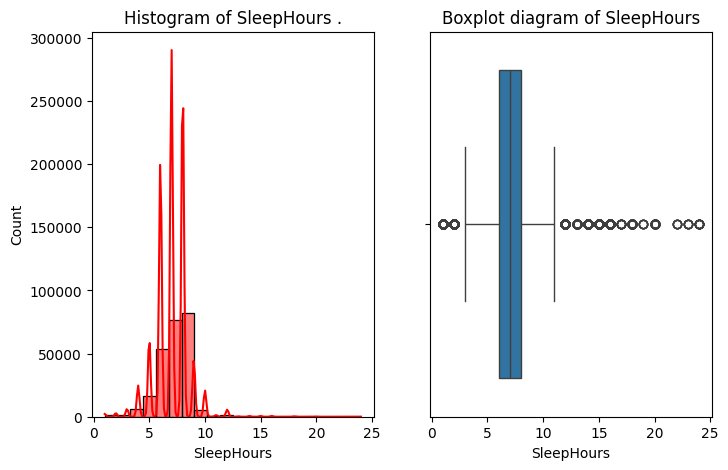

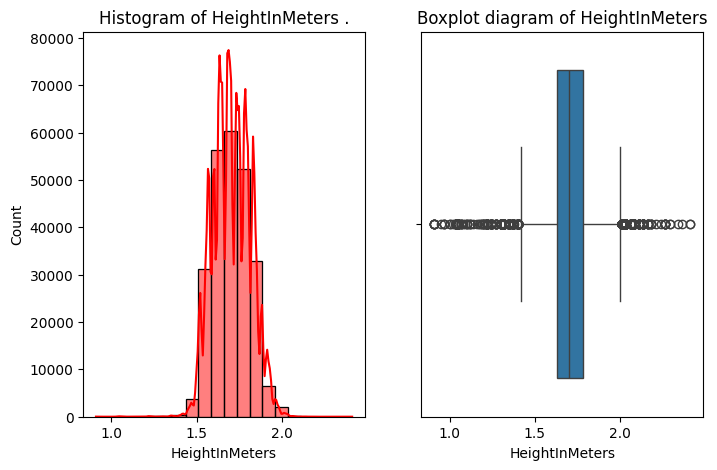

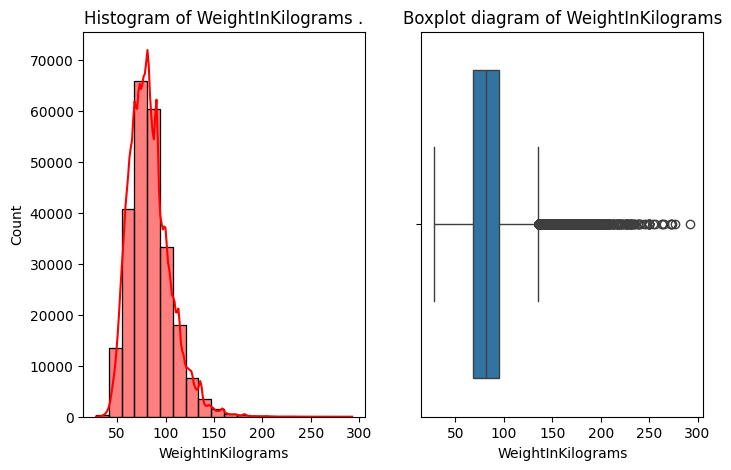

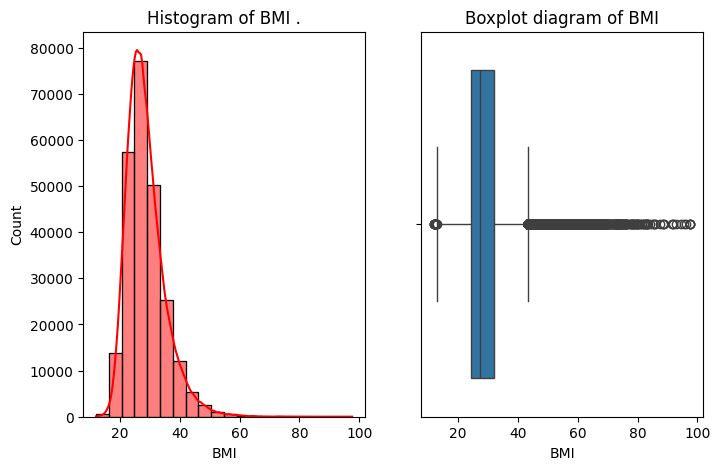

In [51]:
def univariate_analysis_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize=(8,5))    
    sns.histplot(df[col], kde=True, bins=20, color='Red',ax=ax[0])
    ax[0].set_title(f'Histogram of {col} .')
    
    sns.boxplot(x=df[col],ax=ax[1])
    ax[1].set_title(f'Boxplot diagram of {col}')
    
for col in numeric_cols:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_numeric(col)

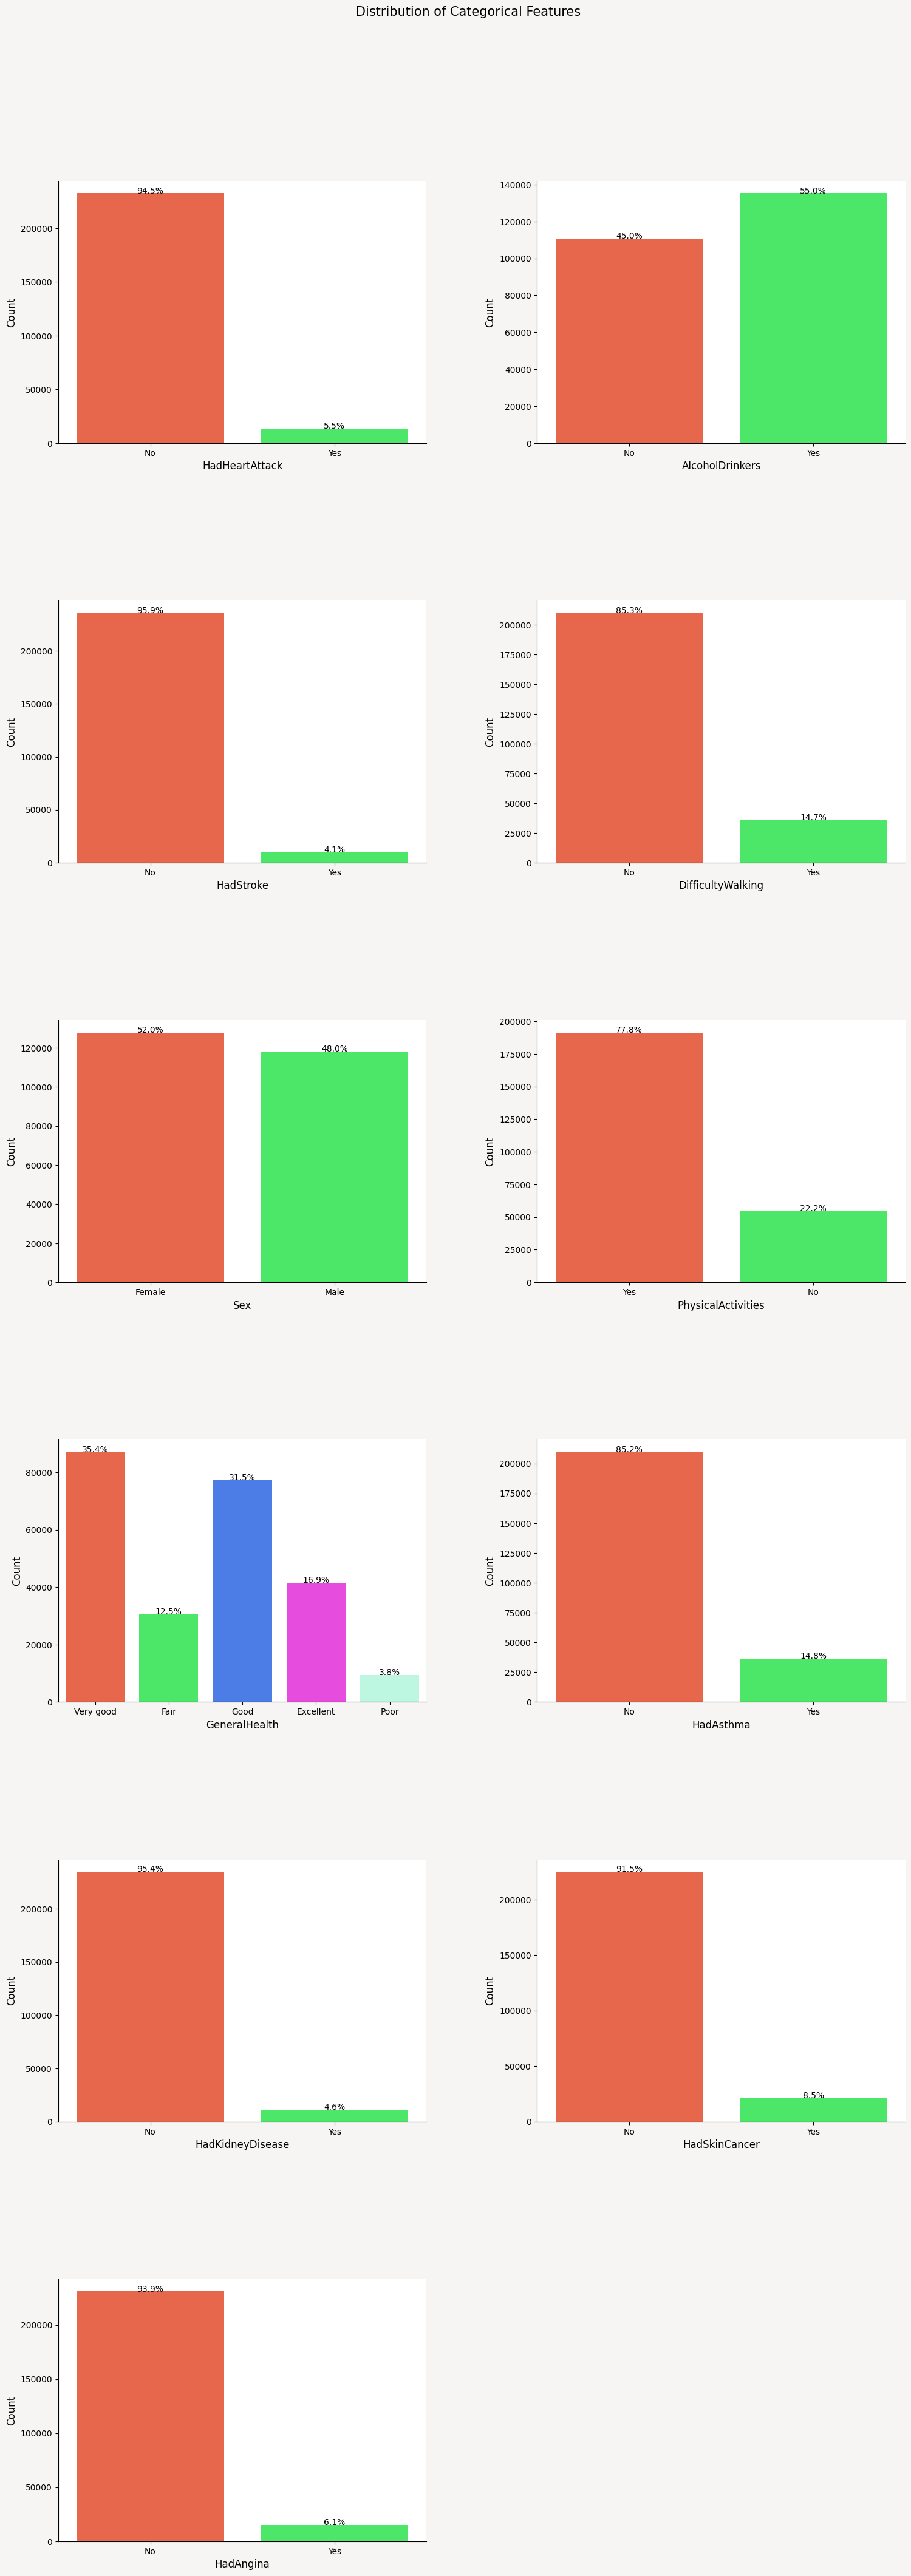

In [52]:
cat_feats = ['HadHeartAttack', 'AlcoholDrinkers', 'HadStroke', 'DifficultyWalking', 'Sex', 'PhysicalActivities',
             'GeneralHealth', 'HadAsthma', 'HadKidneyDisease', 'HadSkinCancer', 'HadAngina']
L = len(cat_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(18, 8 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.6, wspace=0.3)  

i = 0
for col in cat_feats:
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=df, x=col, palette=mypal, ax=ax)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    sns.despine(right=True, ax=ax)
    sns.despine(offset=0, trim=False, ax=ax)
    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

    i += 1
    
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features', fontsize=15)
plt.show()


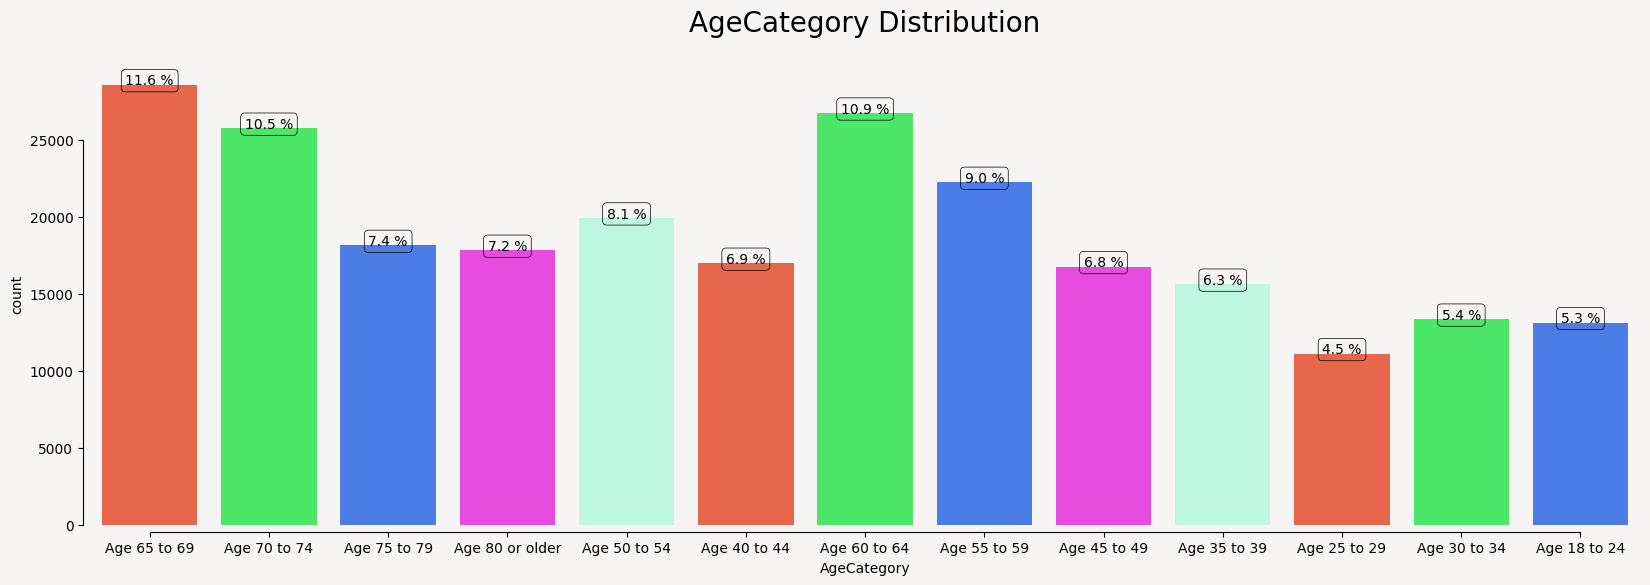

In [53]:
plt.figure(figsize=(20, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['AgeCategory'], palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('AgeCategory Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

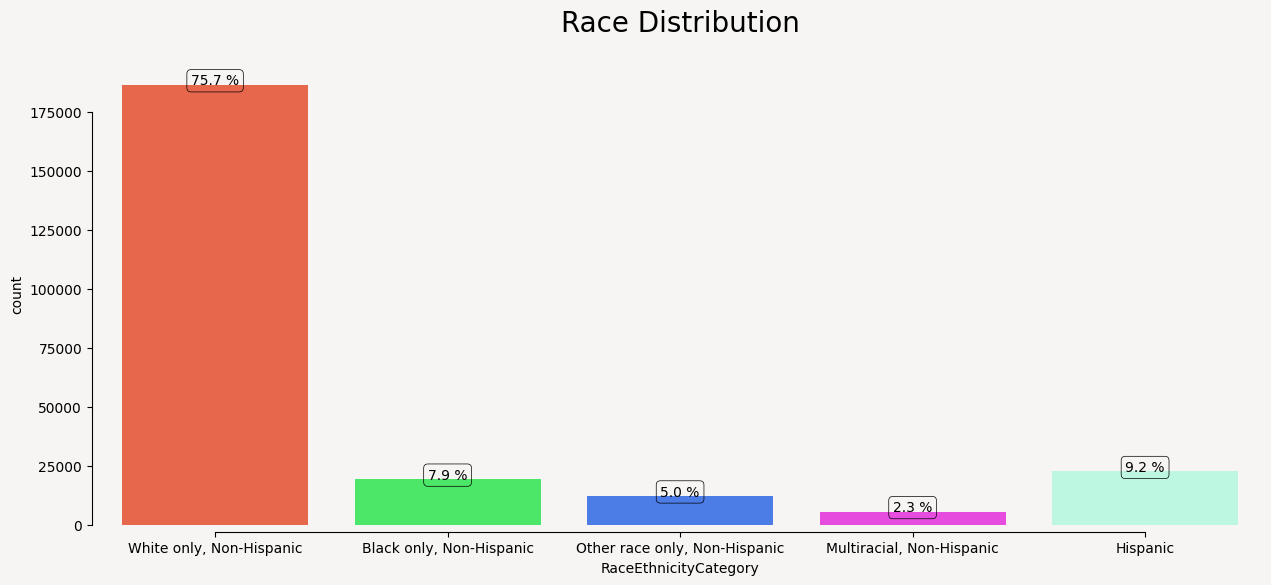

In [54]:
plt.figure(figsize=(15, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['RaceEthnicityCategory'], palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Race Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

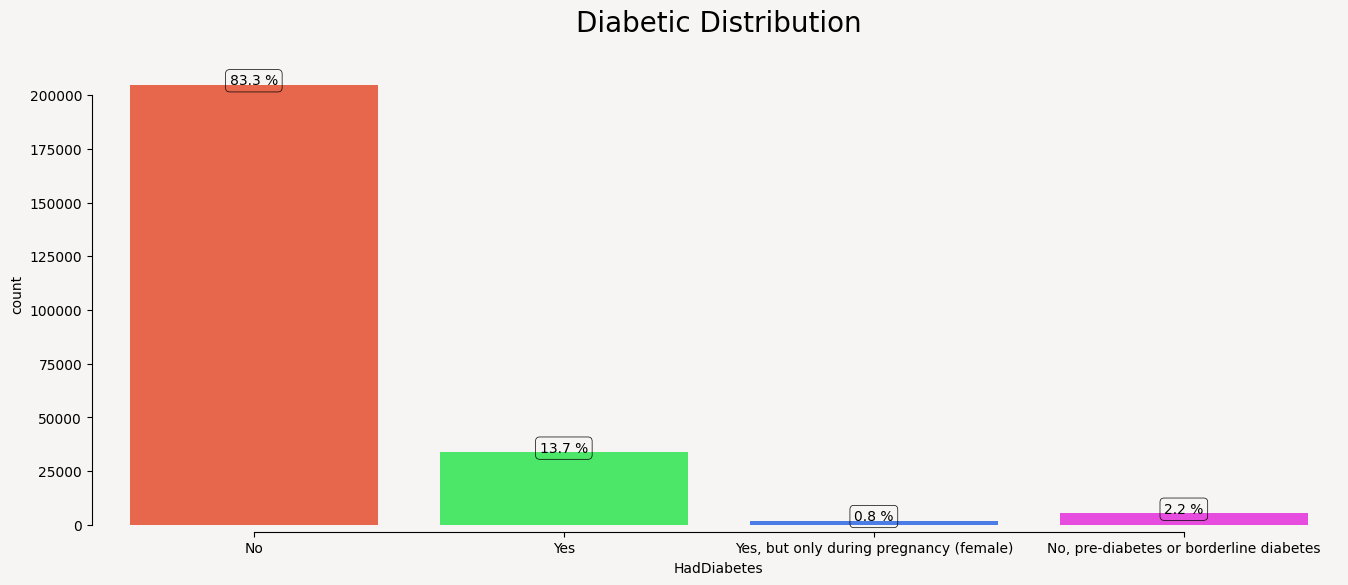

In [55]:
plt.figure(figsize=(16, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HadDiabetes'], palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Diabetic Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Bivariate analysis:

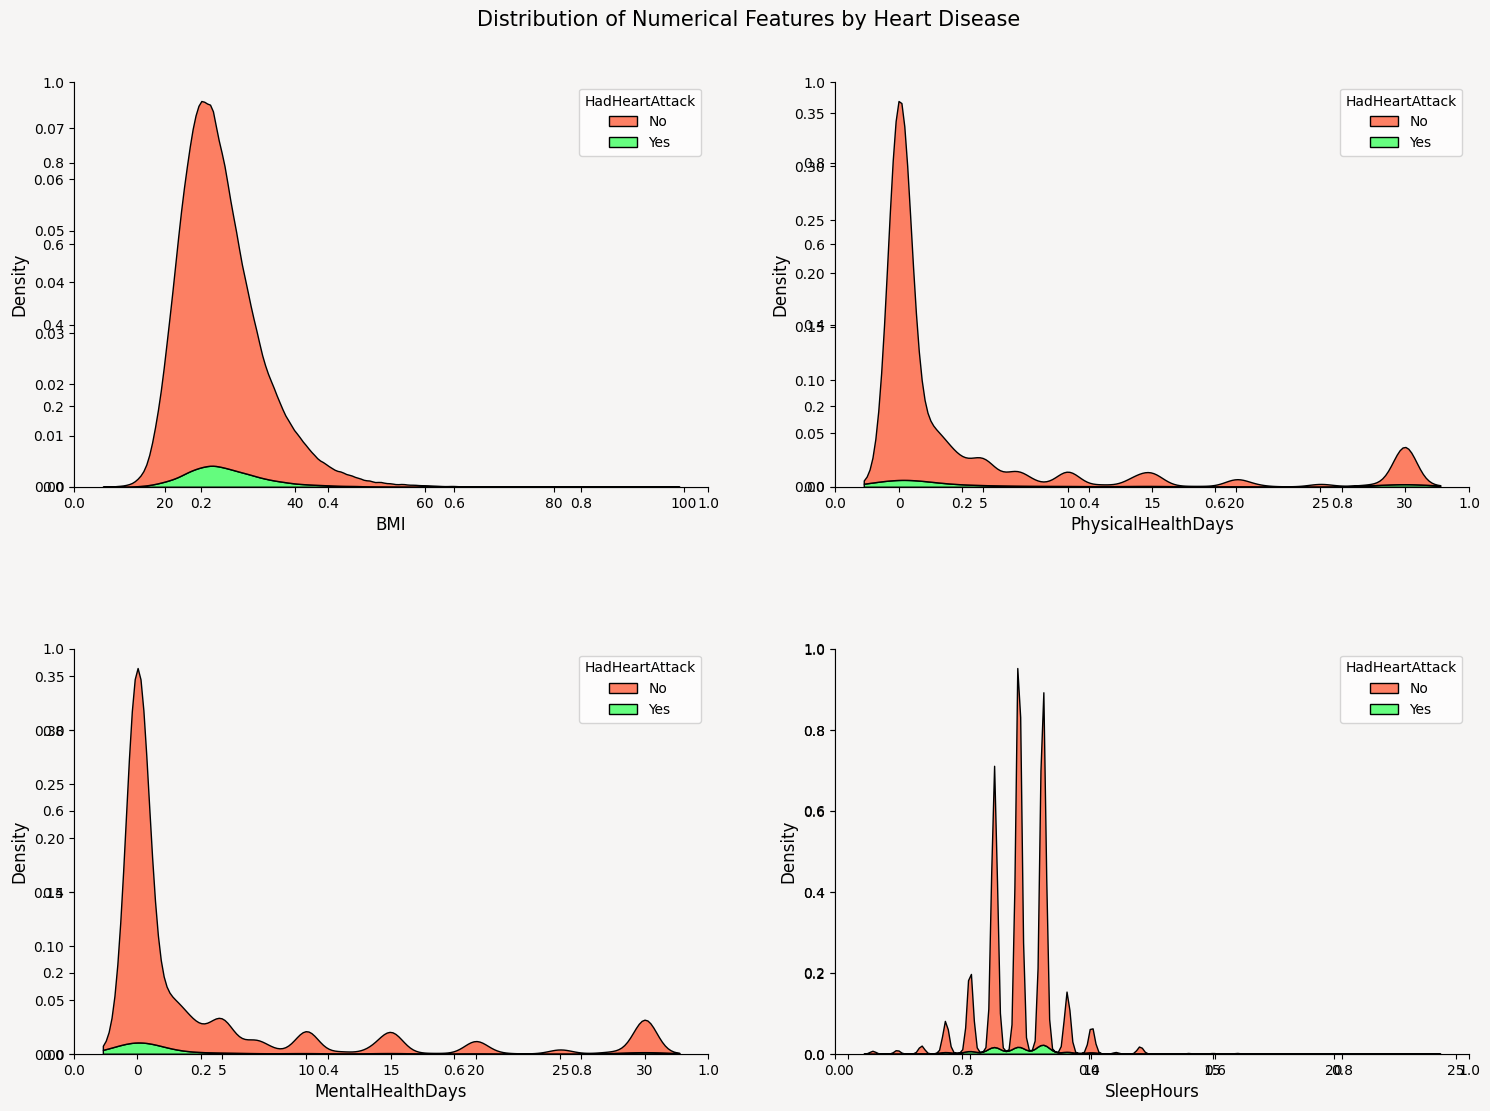

In [56]:
num_feats = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(18, 6 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2) 

i = 0
for col in num_feats:
    plt.subplot(nrow, ncol, i + 1, facecolor='#F6F5F4')

    sns.kdeplot(data=df, x=col, hue="HadHeartAttack", multiple="stack", palette=mypal)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    i += 1

plt.suptitle('Distribution of Numerical Features by Heart Disease', fontsize=15)
plt.show()

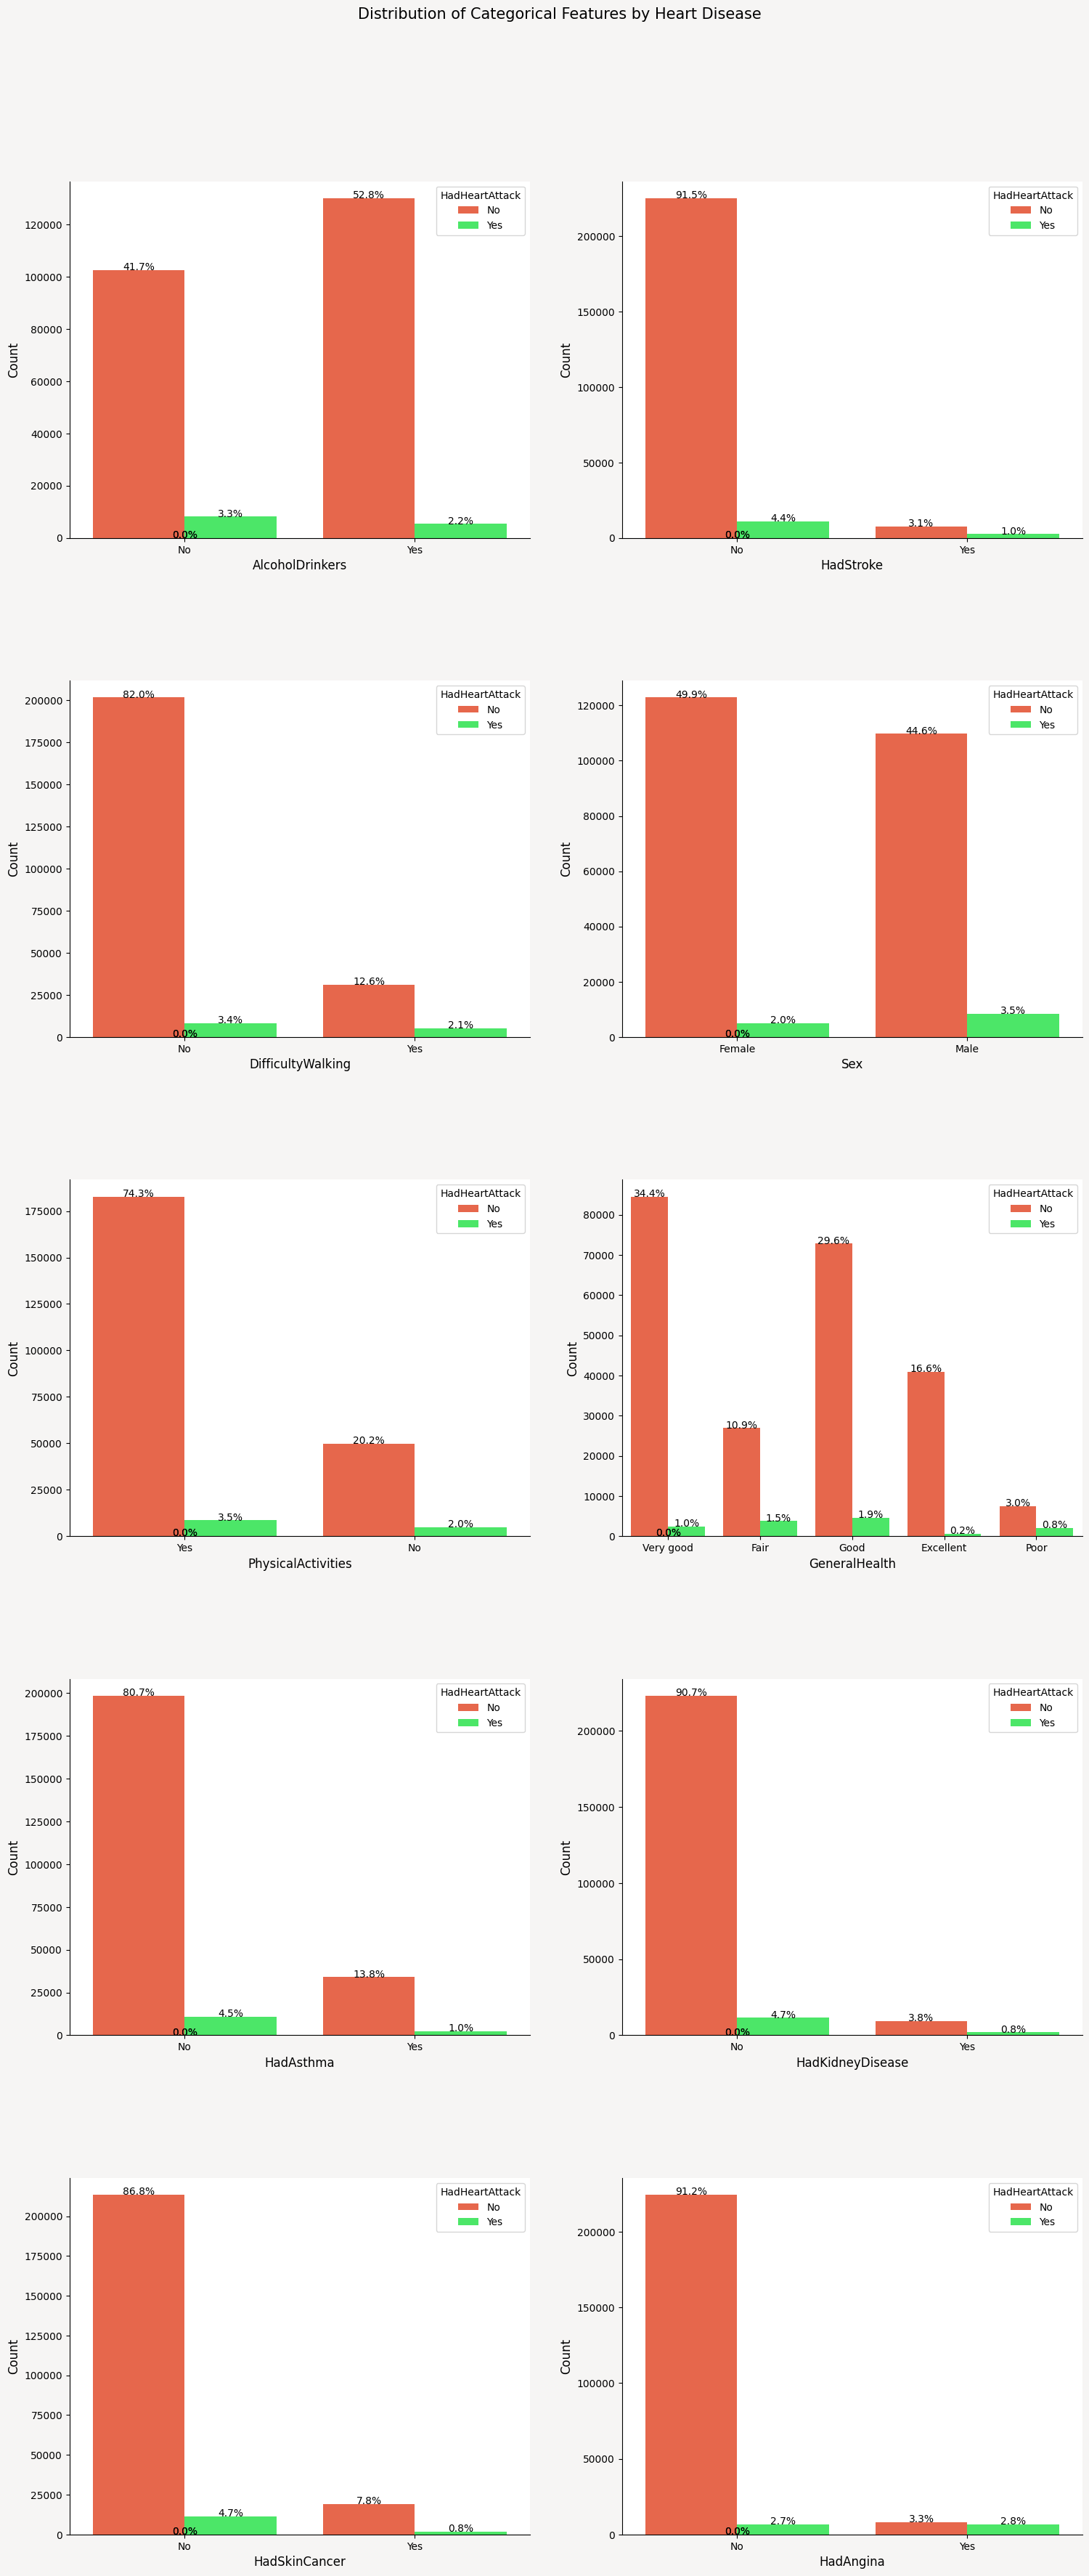

In [57]:
cat_feats = ['AlcoholDrinkers', 'HadStroke', 'DifficultyWalking', 'Sex', 'PhysicalActivities', 'GeneralHealth', 'HadAsthma', 'HadKidneyDisease', 'HadSkinCancer', 'HadAngina']

L = len(cat_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(18, 8 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2)  

for i, col in enumerate(cat_feats):
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=df, x=col, hue="HadHeartAttack", palette=mypal, ax=ax)  
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    sns.despine(right=True, ax=ax)
    sns.despine(offset=0, trim=False, ax=ax)

    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features by Heart Disease', fontsize=15)
plt.show()


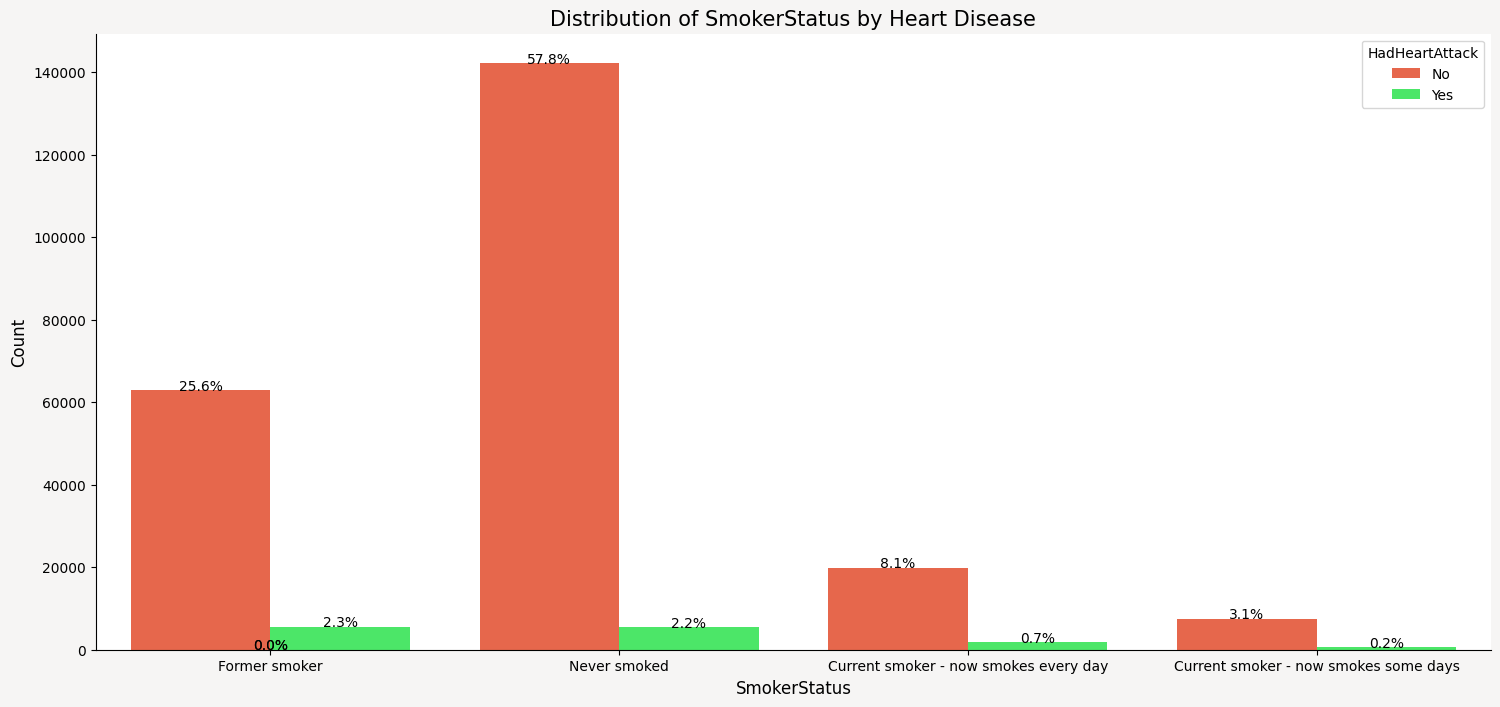

In [58]:
fig_smoker, ax_smoker = plt.subplots(figsize=(18, 8), facecolor='#F6F5F4')
sns.countplot(data=df, x="SmokerStatus", hue="HadHeartAttack", palette=mypal, ax=ax_smoker)
ax_smoker.set_xlabel("SmokerStatus", fontsize=12)
ax_smoker.set_ylabel("Count", fontsize=12)
sns.despine(right=True, ax=ax_smoker)
sns.despine(offset=0, trim=False, ax=ax_smoker)

total = float(len(df))
for p in ax_smoker.patches:
    height = p.get_height()
    ax_smoker.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

ax_smoker.set_title('Distribution of SmokerStatus by Heart Disease', fontsize=15)
plt.show()

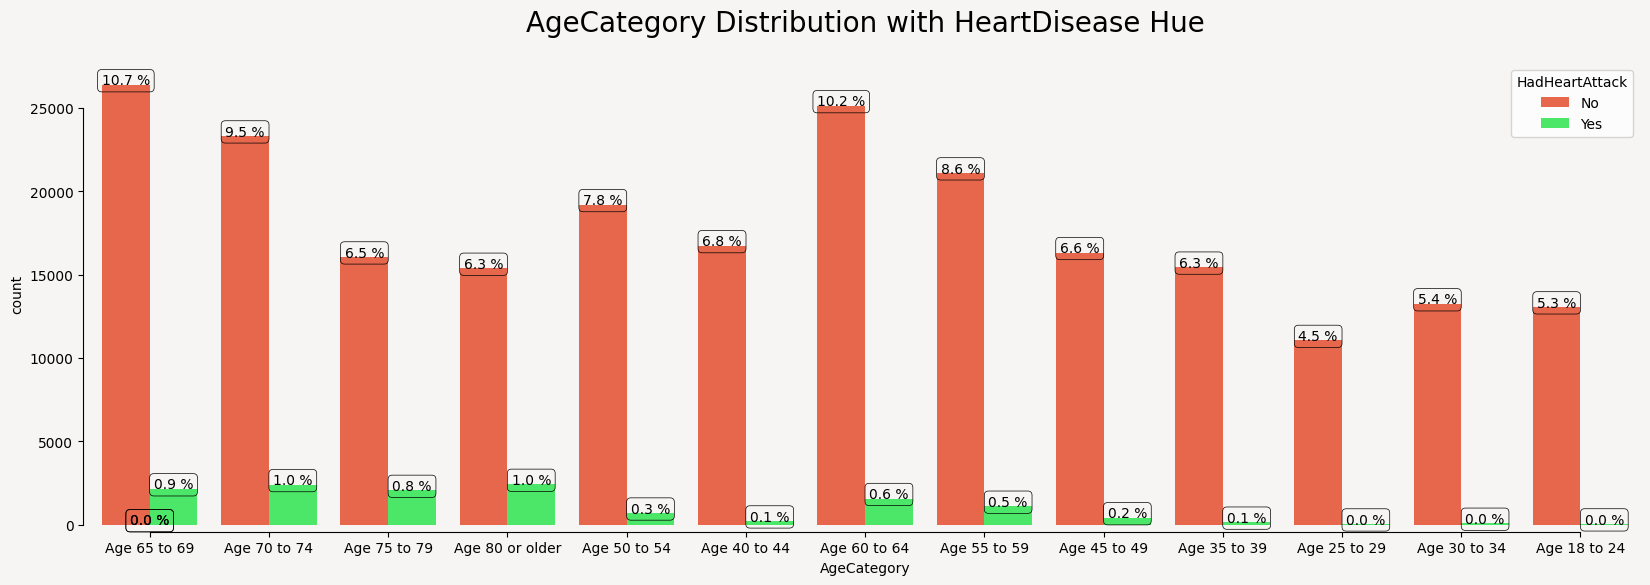

In [59]:
plt.figure(figsize=(20, 6), facecolor='#F6F5F4')
total = float(len(df))

ax = sns.countplot(x='AgeCategory', hue='HadHeartAttack', data=df, palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('AgeCategory Distribution with HeartDisease Hue', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()


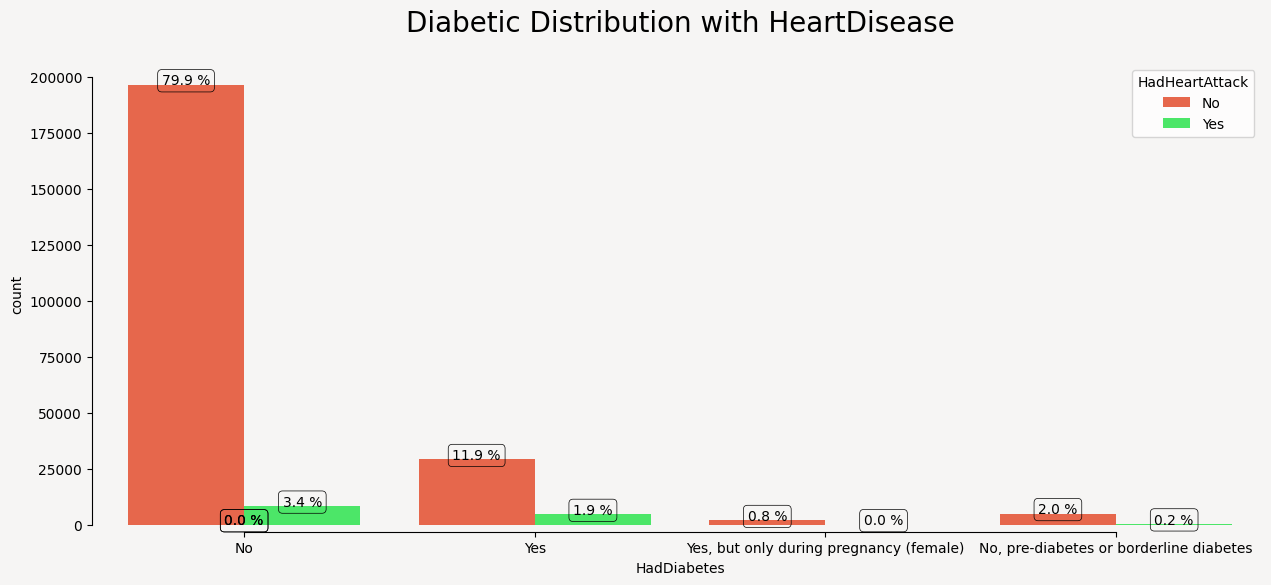

In [60]:
plt.figure(figsize=(15, 6), facecolor='#F6F5F4')
total = float(len(df))

ax = sns.countplot(x='HadDiabetes', hue='HadHeartAttack', data=df, palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Diabetic Distribution with HeartDisease', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()


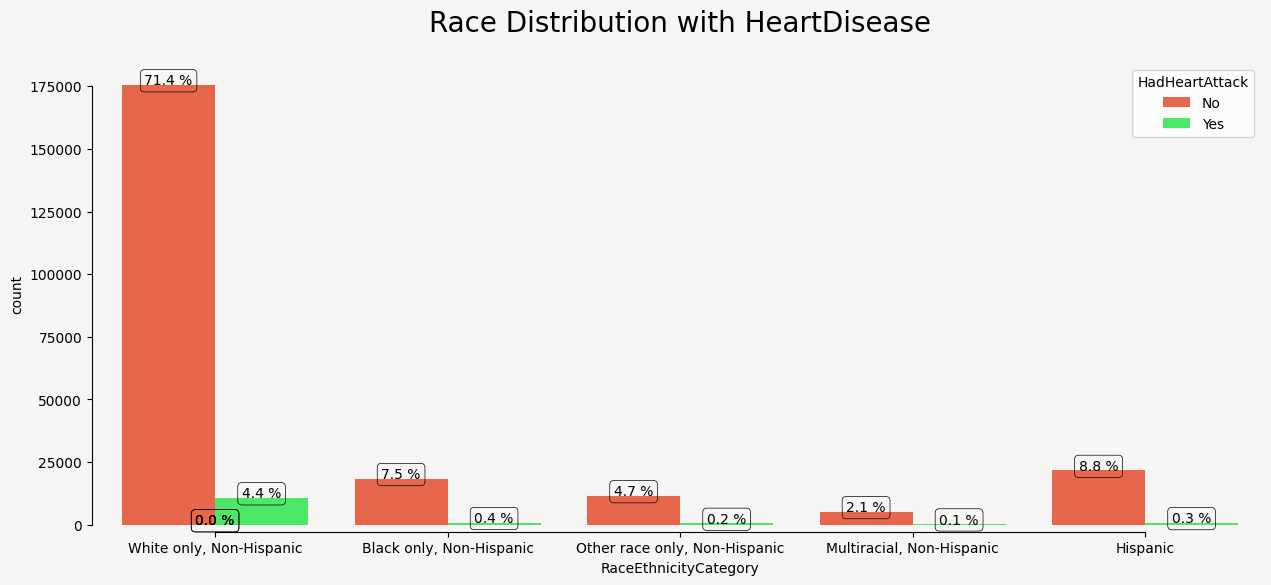

In [61]:
plt.figure(figsize=(15, 6), facecolor='#F6F5F4')
total = float(len(df))

ax = sns.countplot(x='RaceEthnicityCategory', hue='HadHeartAttack', data=df, palette=mypal)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Race Distribution with HeartDisease', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()


# Correlation Matrix:
#### Between numerical values


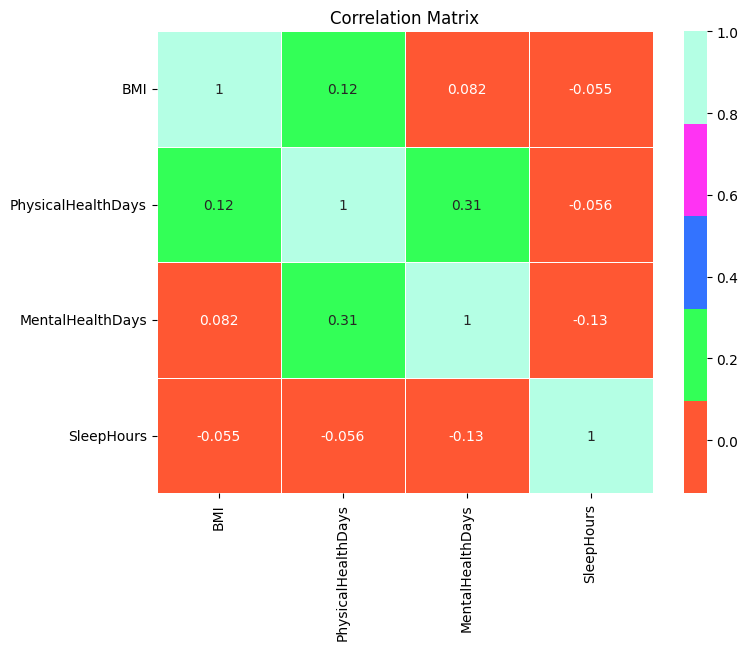

In [62]:
numeric_features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours' ]
numeric_corr = df[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_corr, annot=True, cmap=sns.color_palette(mypal), linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Scaling Numerical Features

In [63]:
df1 = df.copy()

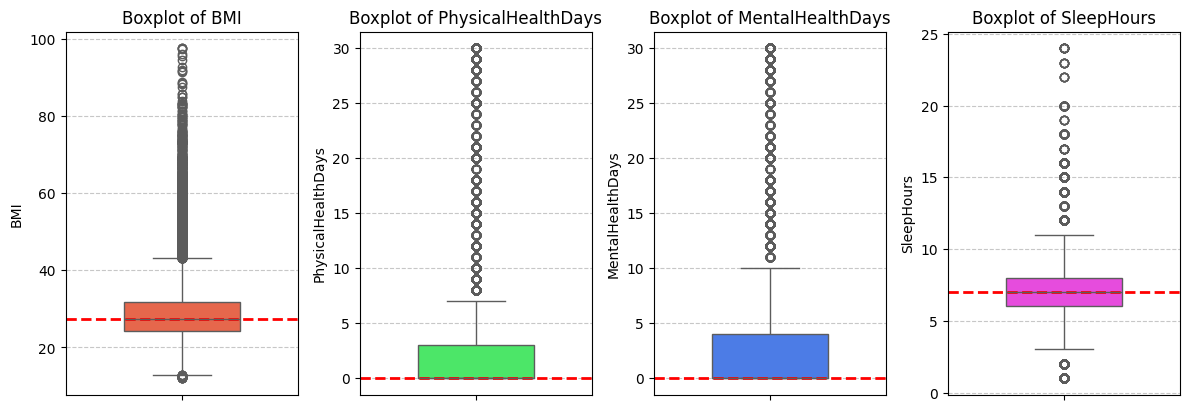

In [64]:
numerical_cols = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

palette = sns.color_palette(mypal)

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df1[column], color=palette[i-1], width=0.5)
    plt.axhline(y=df1[column].median(), color='red', linestyle='--', linewidth=2)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


In [65]:
features_to_scale_robust = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']


robust_scaler = RobustScaler()

df1[features_to_scale_robust] = robust_scaler.fit_transform(df1[features_to_scale_robust])

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

for feature in features_to_scale_robust:
    num_outliers = count_outliers(df1[feature])
    print(f'Number of outliers in {feature}: {num_outliers}')

Number of outliers in BMI: 7563
Number of outliers in PhysicalHealthDays: 38809
Number of outliers in MentalHealthDays: 32714
Number of outliers in SleepHours: 3488


# Z Test for Independence:

In [66]:
from statsmodels.stats.weightstats import ztest

# BMI Vs Heart Attack
#### Null Hypothesis (H0): There is no significant difference in the mean BMI between individuals who have had a heart attack and those who haven't.

#### Alternative Hypothesis (H1): There is a significant difference in the mean BMI between individuals who have had a heart attack and those who haven't.

In [67]:
bmi_heart_attack = df[df['HadHeartAttack'] == 'Yes']['BMI']
bmi_no_heart_attack = df[df['HadHeartAttack'] == 'No']['BMI']
# Perform a two-sample z-test
# By default, ztest assumes unequal variance, which is appropriate for most practical cases
z_stat, p_value = ztest(bmi_heart_attack, bmi_no_heart_attack)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean BMI between individuals who have had a heart attack and those who haven't.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean BMI between individuals who have had a heart attack and those who haven't.")

Z-statistic: 15.08988743514371
P-value: 1.8876406668546862e-51
Reject the null hypothesis: There is a significant difference in the mean BMI between individuals who have had a heart attack and those who haven't.


# Physical Health Days Vs Heart Attack

#### Null Hypothesis (H0): There is no significant difference in the mean Physical Health Days between individuals who have had a heart attack and those who haven't.

#### Alternative Hypothesis (H1): There is a significant difference in the mean Physical Health Days between individuals who have had a heart attack and those who haven't.

In [68]:
physical_health_days_heart_attack = df[df['HadHeartAttack'] == 'Yes']['PhysicalHealthDays']
physical_health_days_no_heart_attack = df[df['HadHeartAttack'] == 'No']['PhysicalHealthDays']
# Perform a two-sample z-test
# By default, ztest assumes unequal variance, which is appropriate for most practical cases
z_stat, p_value = ztest(physical_health_days_heart_attack, physical_health_days_no_heart_attack)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean of Physical health days between individuals who have had a heart attack and those who haven't.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean of Physical health days between individuals who have had a heart attack and those who haven't.")

Z-statistic: 66.77360247352787
P-value: 0.0
Reject the null hypothesis: There is a significant difference in the mean of Physical health days between individuals who have had a heart attack and those who haven't.


# Sleep Hours Vs Heart Attack

#### Null Hypothesis (H0): There is no significant difference in the mean of Sleeping Hours between individuals who have had a heart attack and those who haven't.

#### Alternative Hypothesis (H1): There is a significant difference in the mean of Sleeping Hours between individuals who have had a heart attack and those who haven't.

In [69]:
SleepHours_heart_attack = df[df['HadHeartAttack'] == 'Yes']['SleepHours']
SleepHours_no_heart_attack = df[df['HadHeartAttack'] == 'No']['SleepHours']
# Perform a two-sample z-test
# By default, ztest assumes unequal variance, which is appropriate for most practical cases
z_stat, p_value = ztest(SleepHours_heart_attack, SleepHours_no_heart_attack)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean of Sleep Hours between individuals who have had a heart attack and those who haven't.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean of Sleep Hours between individuals who have had a heart attack and those who haven't.")

Z-statistic: 1.8025623243130904
P-value: 0.07145697843990968
Fail to reject the null hypothesis: There is no significant difference in the mean of Sleep Hours between individuals who have had a heart attack and those who haven't.


# Mental Health Days Vs Heart Attack

#### Null Hypothesis (H0): There is no significant difference in the mean of Mental Health Days between individuals who have had a heart attack and those who haven't.

#### Alternative Hypothesis (H1): There is a significant difference in the mean of Mental Health Days between individuals who have had a heart attack and those who haven't.

In [70]:
MentalHealthDays_heart_attack = df[df['HadHeartAttack'] == 'Yes']['MentalHealthDays']
MentalHealthDays_no_heart_attack = df[df['HadHeartAttack'] == 'No']['SleepHours']
# Perform a two-sample z-test
# By default, ztest assumes unequal variance, which is appropriate for most practical cases
z_stat, p_value = ztest(MentalHealthDays_heart_attack, MentalHealthDays_no_heart_attack)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean of Mental Health Days between individuals who have had a heart attack and those who haven't.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean of Mental Health Days between individuals who have had a heart attack and those who haven't.")

Z-statistic: -85.60980663008152
P-value: 0.0
Reject the null hypothesis: There is a significant difference in the mean of Mental Health Days between individuals who have had a heart attack and those who haven't.


# Multivariate Analysis

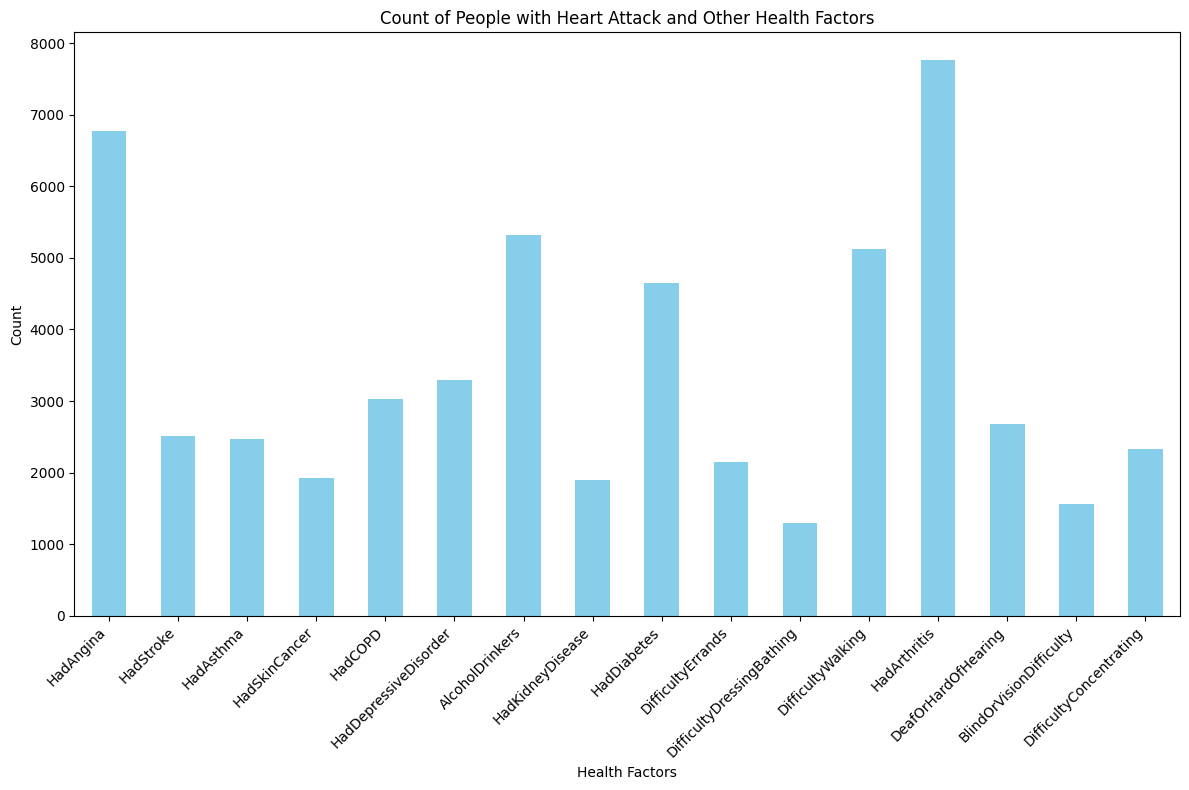

In [71]:
# Filter rows where HadHeartAttack is "Yes"
heart_attack_df = df[df['HadHeartAttack'] == 'Yes']

health_factors = ['HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 
                  'AlcoholDrinkers', 'HadKidneyDisease', 'HadDiabetes', 'DifficultyErrands', 'DifficultyDressingBathing', 'DifficultyWalking', 
                  'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating']

# Count occurrences of "Yes" for each health factor
counts = heart_attack_df[health_factors].apply(lambda x: (x == 'Yes').sum())

# Create the bar chart
plt.figure(figsize=(12, 8))
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Health Factors')
plt.ylabel('Count')
plt.title('Count of People with Heart Attack and Other Health Factors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()